# Exploração e análise de dados de crédito utilizando o SQL
Esse notebook faz parte do curso de Análise de Dados EBAC - Módulo 36

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* estado_civil = se é solteiro(a) ou casado(a)
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: 

https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

Com base nas informações obtidas, empreenderemos uma série de análises detalhadas e aprofundadas. Estas análises servirão de fundamento para a formulação de decisões estratégicas, as quais visam impulsionar o crescimento sustentado e contínuo da organização, assegurando seu desenvolvimento e competitividade no mercado.

# Distribuição de Idade e Sexo entre quem fez mais compras

Nosso objetivo é analisar detalhadamente a distribuição demográfica de nossos clientes mais assíduos, focando especialmente na amostragem de gênero e nas diferentes faixas etárias daqueles que realizaram o maior número de compras.

In [1]:
SELECT idade, sexo, COUNT(*) AS qtd_clientes
FROM default.credito
GROUP BY idade, sexo
ORDER BY qtd_clientes DESC
LIMIT 10;

SyntaxError: invalid syntax (3524206676.py, line 1)

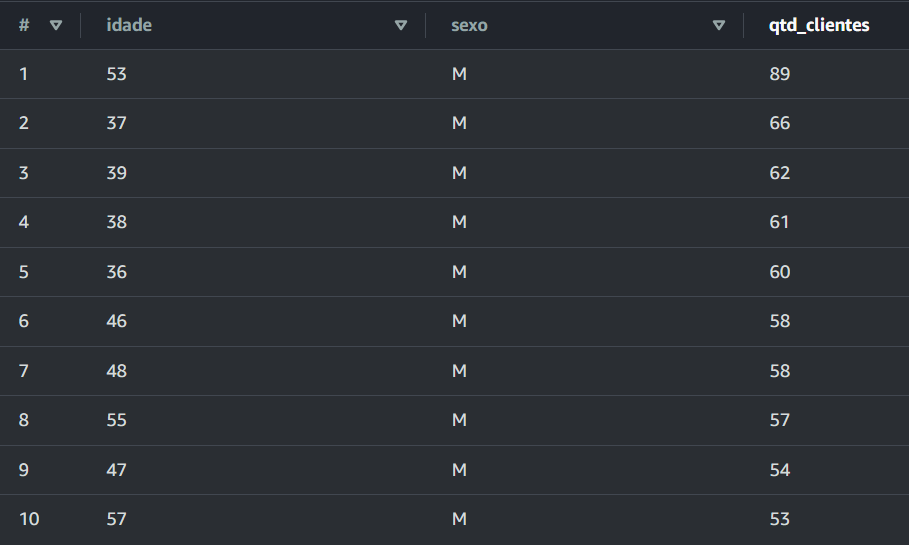

Analisamos que o segmento mais ativo em termos de volume de transações é composto predominantemente por indivíduos do sexo masculino, situados na faixa etária compreendida entre 36 e 57 anos. Essa constatação revela um padrão demográfico específico dentro do nosso público consumidor, indicando que homens de meia-idade desempenham um papel preponderante na movimentação de nossas vendas.

# Faixa etária dos clientes do cartão

Dado a informação anterior, resolvemos aprofundar o entendimento sobre a faixa etária que compõem a nossa clientela

In [ ]:
SELECT faixa_etaria, COUNT(*) AS qtd_clientes
FROM (
  SELECT 
    CASE 
      WHEN idade < 20 THEN '<20'
      WHEN idade BETWEEN 20 AND 29 THEN '20-29'
      WHEN idade BETWEEN 30 AND 39 THEN '30-39'
      WHEN idade BETWEEN 40 AND 49 THEN '40-49'
      WHEN idade BETWEEN 50 AND 59 THEN '50-59'
      ELSE '60+'
    END AS faixa_etaria
  FROM default.credito
) AS subquery
GROUP BY faixa_etaria
ORDER BY qtd_clientes DESC;

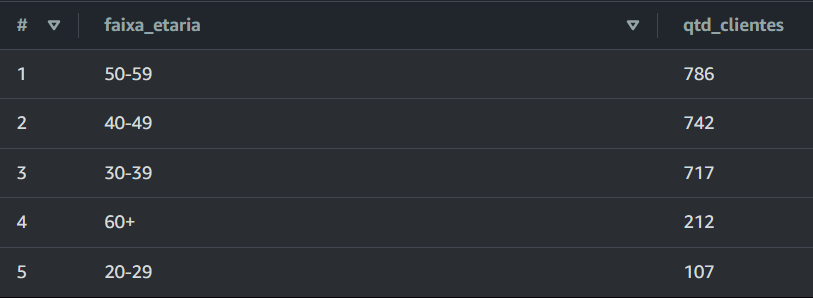

Então faz total sentido que o grosso da clientela esteja entre 36 e 57 anos, haja visto que há uma grande predominância da faixa etária entre 40 e 59 anos na nossa cartela. Ao passo que os clientes entre 20 e 29 anos representam apenas uma pequena parcela e abaixo de 20 anos não há ninguém.

# Aplicando o recorte de gênero nessa conta

Entendemos porquê o público é predominantemente mais velho, mas agora vamos tentar entender a predominância masculina destrinchando as faixas etárias dividindo o gênero.

In [ ]:
SELECT faixa_etaria, sexo, COUNT(*) AS qtd_clientes
FROM (
  SELECT 
    CASE 
      WHEN idade < 20 THEN '<20'
      WHEN idade BETWEEN 20 AND 29 THEN '20-29'
      WHEN idade BETWEEN 30 AND 39 THEN '30-39'
      WHEN idade BETWEEN 40 AND 49 THEN '40-49'
      WHEN idade BETWEEN 50 AND 59 THEN '50-59'
      ELSE '60+'
    END AS faixa_etaria,
    sexo
  FROM default.credito
) AS subquery
GROUP BY faixa_etaria, sexo
ORDER BY qtd_clientes DESC;

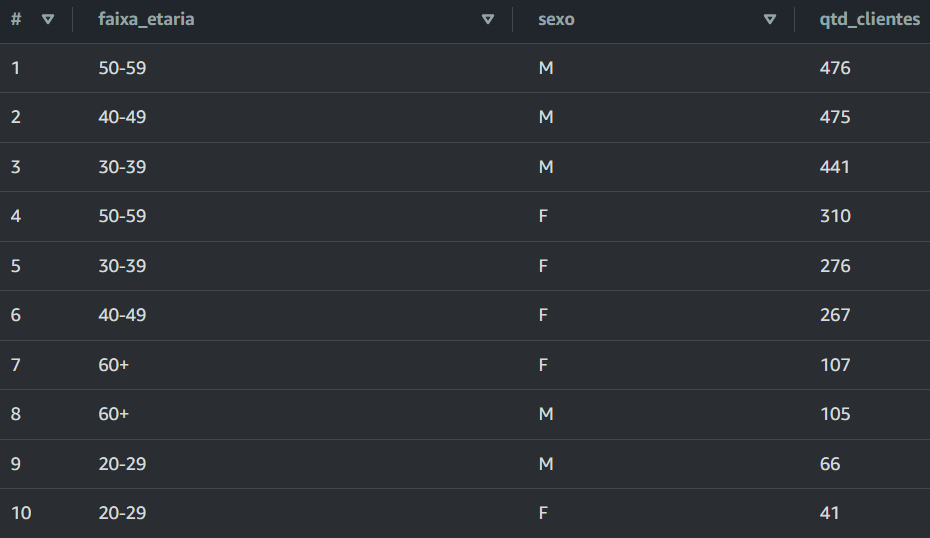

E fica claro que a clientela feminina só é maior, e apenas ligeiramente maior (2 clientes), na faixa acima de 60 anos. Em todas as outras, a predominância masculina é bem grande.

# Analisando o limite de crédito

Será que o limite de crédito oferecido aos clientes exerce um impacto substancial no volume de compras efetuado por eles? Vamos realizar uma análise para explorar essa correlação.

In [ ]:
SELECT 
  faixa_etaria, 
  sexo, 
  ROUND(AVG(CAST(limite_credito AS double)), 2) AS media_limite_credito
FROM (
  SELECT 
    CASE 
      WHEN idade < 20 THEN '<20'
      WHEN idade BETWEEN 20 AND 29 THEN '20-29'
      WHEN idade BETWEEN 30 AND 39 THEN '30-39'
      WHEN idade BETWEEN 40 AND 49 THEN '40-49'
      WHEN idade BETWEEN 50 AND 59 THEN '50-59'
      ELSE '60+'
    END AS faixa_etaria,
    sexo,
    limite_credito
  FROM default.credito
) AS subquery
GROUP BY faixa_etaria, sexo
ORDER BY media_limite_credito DESC;

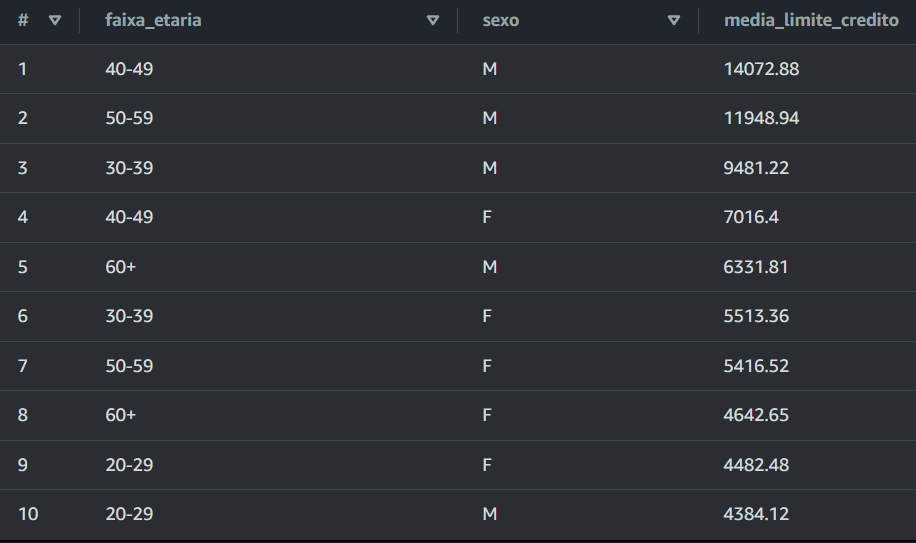

Aqui limitamos a média de crédito a duas casas decimais para nos aproximar de um valor real. E como é de se supor, o grupo com mais volumes de compra é justamente o que tem mais crédito disponível. Chama a atenção também como homens acima de 60 anos tem crédito disponível e não o utilizam.

# Estado civil interferindo no valor gasto

Vimos um pouco da influência da idade e gênero nos gastos e também como estão distribuídos os limites de crédito. Agora vamos ver se o estado civil,

In [ ]:
SELECT 
  estado_civil,
  CASE 
    WHEN idade < 20 THEN '<20'
    WHEN idade BETWEEN 20 AND 29 THEN '20-29'
    WHEN idade BETWEEN 30 AND 39 THEN '30-39'
    WHEN idade BETWEEN 40 AND 49 THEN '40-49'
    WHEN idade >= 50 THEN '50+'
  END AS faixa_etaria,
  ROUND(AVG(valor_transacoes_12m), 2) AS media_valor_gasto
FROM default.credito
WHERE estado_civil <> 'na'
GROUP BY estado_civil, 
  CASE 
    WHEN idade < 20 THEN '<20'
    WHEN idade BETWEEN 20 AND 29 THEN '20-29'
    WHEN idade BETWEEN 30 AND 39 THEN '30-39'
    WHEN idade BETWEEN 40 AND 49 THEN '40-49'
    WHEN idade >= 50 THEN '50+'
  END
ORDER BY media_valor_gasto DESC;

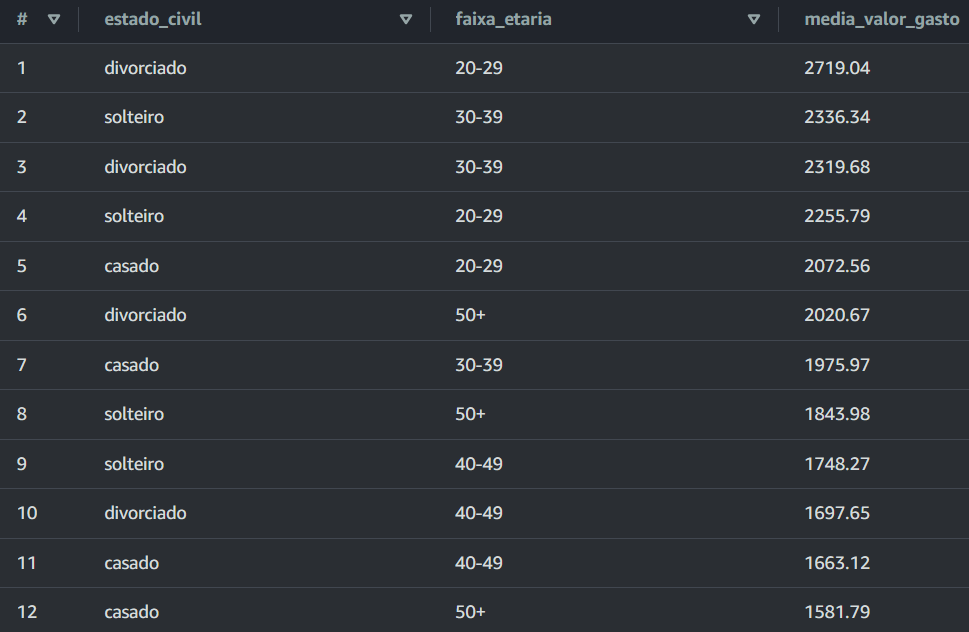

Aqui novamente limitamos o resultado a duas casas decimais para facilitar o entendimento. Também excluímos da análise aqueles que não tem informação fornecida sobre estado civil para que não distorcesse as nossas conclusões. É curioso que jovens solteiros e divorciados tenham uma média de gasto maior, provavelmente por terem que arcar com todos os próprios custos sozinhos, sem divisão com cônjuge.

# Conclusões

* O público masculino mais velho gasta mais
* A faixa etária dos clientes é alta
* Os clientes homens são ampla maioria
* O que pode ser explicado pois é o grupo com mais crédito liberado
* Na média de gasto individual, casados gastam menos